Python code to implement Linear Regression for multi-dimensional input and one-dimensional output using Matrix Inverse.

In [59]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import autograd
import autograd.numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [133]:
# Read data set
df = pd.read_csv("Data4.csv")
# Merging the constant factor with other coefficients
df.insert(loc = 0, column='x0', value=[1 for _ in range(len(df))])
df.rename(columns={'x': 'x1'}, inplace=True)
df.head(5)

,x0,Sl.,x1,x2,x3,y
0,1,1,0.1,0.311089,0.390541,14.705876
1,1,2,0.2,0.639066,1.389918,26.585100
2,1,3,0.3,0.840228,1.939903,36.791509
3,1,4,0.4,1.299710,2.153009,34.090806
4,1,5,0.5,0.941784,0.945136,31.118089


In [134]:
# Plot the graph
def plot2D(dF):
    try:
        fig = px.scatter(dF, x='x1', y='y', title='2D Scatter Plot',
        labels={'X': 'X-axis', 'Y': 'Y-axis'})
        fig.show()
    except:
        print("Not proper dataFrame")

In [135]:
plot2D(df)

In [136]:
def plot3D(dataFrame):
    # Create an interactive 3D scatter plot with Plotly
    try:
        fig = px.scatter_3d(df, x=df.columns[0], y=df.columns[1], z=df.columns[2], title='3D Plot for Visualization',
        labels={'x1': 'Predictor1', 'x2': 'Predictor2', 'y': 'Predicate'})
        fig.show()
    except:
        print("Not proper dataFrame")

In [137]:
plot3D(df)

In [138]:
from sklearn.model_selection import train_test_split

def multivariate_linear_regression(data_frame):
    # Extracting features (X) and target variable (y)
    X = data_frame.iloc[:, :-1].values
    y = data_frame.iloc[:, -1:].values

    num_features = len(data_frame.columns) - 1
    matrix = np.zeros((num_features, num_features))
    vector = np.zeros((num_features, 1))

    for i in range(len(X)):
        y_i = np.array(y[i][0]).reshape(-1, 1)
        X_i = np.array(X[i]).reshape(-1, 1)
        X_i_T = np.transpose(X_i)
        matrix += X_i @ X_i_T
        vector += X_i @ y_i

    weights = np.linalg.pinv(matrix) @ vector
    return weights

def predict_multivariate_linear_regression(data_frame):
    # Split data into 80:20 ratio
    train_df, test_df = train_test_split(data_frame, test_size=0.2, random_state=42)
    coefficients = multivariate_linear_regression(train_df)  # Train over train_df

    # Make predictions over test_df
    X_test = test_df.iloc[:, :-1].values
    y_test = test_df.iloc[:, -1:].values
    predictions = np.zeros((len(test_df), 1))

    for i in range(len(X_test)):
        value = coefficients.T @ X_test[i].reshape(-1, 1)
        predictions[i] = value

    return y_test, predictions

In [139]:
multivariate_linear_regression(df)

array([[13.23947782],
       [ 0.60717204],
       [ 0.0607172 ],
       [ 2.39226554],
       [ 7.74681038]])

In [140]:
import numpy as np

def gradDescent(dataFrame, cost_function, gradient_function, eta, num_iterations=1000):
    W = np.zeros((len(dataFrame.columns) - 1, 1))

    for _ in range(num_iterations):
        W = W - eta * gradient_function(dataFrame, W)

    return W

def linRegGradient(dataFrame, W):
    n = len(dataFrame)
    X = dataFrame.iloc[:, :-1].values
    y = dataFrame.iloc[:, -1:].values.reshape(-1, 1)

    error = X @ W - y
    gradient = X.T @ error
    return gradient * (2 / n)

def linRegCost(dataFrame, W):
    n = len(dataFrame)
    X = dataFrame.iloc[:, :-1].values
    y = dataFrame.iloc[:, -1:].values
    cost = np.mean((X @ W - y)**2) / 2
    return cost



In [141]:
# Example usage
result = gradDescent(df, linRegCost, linRegGradient, eta=0.01, num_iterations=1000)
result


C:\Users\Ashutosh Mehta\AppData\Local\Temp\ipykernel_19880\1701234702.py:17: RuntimeWarning:

overflow encountered in matmul

C:\Users\Ashutosh Mehta\AppData\Local\Temp\ipykernel_19880\1701234702.py:7: RuntimeWarning:

invalid value encountered in subtract



array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [142]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
coeffVector = multivariate_linear_regression(train_df)  # Train over train_df
predict_multivariate_linear_regression(df)

(array([[157.8544379 ],
        [102.7254886 ],
        [134.6512765 ],
        [ 96.28146215],
        [111.3540975 ],
        [ 94.90891571],
        [ 55.40839286],
        [148.850355  ],
        [ 36.20101838],
        [ 14.7058762 ],
        [ 40.40471912],
        [ 65.956972  ],
        [137.160386  ],
        [ 88.83592511],
        [171.8398376 ],
        [ 31.11808936],
        [150.9667726 ],
        [147.9958667 ],
        [ 36.86808958],
        [ 85.37297905]]),
 array([[159.78008261],
        [102.0493128 ],
        [139.99575617],
        [103.7091581 ],
        [102.30548689],
        [ 87.42911519],
        [ 61.15563797],
        [151.97396123],
        [ 42.44278472],
        [ 18.19965689],
        [ 45.63004686],
        [ 73.14916867],
        [139.847782  ],
        [ 80.75582525],
        [172.37953877],
        [ 26.76754078],
        [146.40902748],
        [151.52540698],
        [ 43.98421109],
        [ 77.11008988]]))

In [143]:
def sciLearnPredictMultiLinearReg(dataFrame):
    train_df, test_df = train_test_split(dataFrame, test_size=0.2, random_state=42)

    # Create and train the model
    multivariate_model = LinearRegression()
    multivariate_model.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)

    # Make predictions
    predictions = multivariate_model.predict(test_df.iloc[:, :-1].values).reshape(-1, 1)

    return test_df.iloc[:, -1:].values, predictions


In [144]:
sciLearnPredictMultiLinearReg(df)

(array([[157.8544379 ],
        [102.7254886 ],
        [134.6512765 ],
        [ 96.28146215],
        [111.3540975 ],
        [ 94.90891571],
        [ 55.40839286],
        [148.850355  ],
        [ 36.20101838],
        [ 14.7058762 ],
        [ 40.40471912],
        [ 65.956972  ],
        [137.160386  ],
        [ 88.83592511],
        [171.8398376 ],
        [ 31.11808936],
        [150.9667726 ],
        [147.9958667 ],
        [ 36.86808958],
        [ 85.37297905]]),
 array([[159.78008261],
        [102.0493128 ],
        [139.99575617],
        [103.7091581 ],
        [102.30548689],
        [ 87.42911519],
        [ 61.15563797],
        [151.97396123],
        [ 42.44278472],
        [ 18.19965689],
        [ 45.63004686],
        [ 73.14916867],
        [139.847782  ],
        [ 80.75582525],
        [172.37953877],
        [ 26.76754078],
        [146.40902748],
        [151.52540698],
        [ 43.98421109],
        [ 77.11008988]]))

In [145]:
def tranformData(dataFrame):
    featureDegreeList = []  # Tells the degree of each dimension as per their column index
    newCol = len(dataFrame.columns) - 1

    for i in range(1, newCol):
        degree = int(input(f"Enter the highest degree for x{i}: "))
        featureDegreeList.append(degree)

        if degree != 1:
            dataFrame[f'x{i}'] = dataFrame[f'x{i}']**degree

    return featureDegreeList

def polyLinearReg(dataFrame):
    return multivariate_linear_regression(dataFrame)

def predictPolyLinearReg(dataFrame):
    dataFrameCopy = dataFrame.copy()
    tranformData(dataFrameCopy)
    train_df, test_df = train_test_split(dataFrameCopy)
    coeffVector = polyLinearReg(train_df)

    X = test_df.iloc[:, :-1].values
    y = test_df.iloc[:, -1:].values
    prediction = np.dot(X, coeffVector)

    return y, prediction


In [146]:
predictPolyLinearReg(df)

Enter the highest degree for x1: 3
Enter the highest degree for x2: 3
Enter the highest degree for x3: 3
Enter the highest degree for x4: 3


KeyError: 'x4'

In [147]:
def sciLearnPredictPolyLinearReg(dataFrame, degree=1):
    train_df, test_df = train_test_split(dataFrame, test_size=0.2, random_state=42)

    # Create and train the model
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)

    # Make predictions
    predictions = poly_model.predict(test_df.iloc[:, :-1].values).reshape(-1, 1)

    return test_df.iloc[:, -1:].values, predictions

In [148]:
sciLearnPredictPolyLinearReg(df)

(array([[157.8544379 ],
        [102.7254886 ],
        [134.6512765 ],
        [ 96.28146215],
        [111.3540975 ],
        [ 94.90891571],
        [ 55.40839286],
        [148.850355  ],
        [ 36.20101838],
        [ 14.7058762 ],
        [ 40.40471912],
        [ 65.956972  ],
        [137.160386  ],
        [ 88.83592511],
        [171.8398376 ],
        [ 31.11808936],
        [150.9667726 ],
        [147.9958667 ],
        [ 36.86808958],
        [ 85.37297905]]),
 array([[159.78008261],
        [102.0493128 ],
        [139.99575617],
        [103.7091581 ],
        [102.30548689],
        [ 87.42911519],
        [ 61.15563797],
        [151.97396123],
        [ 42.44278472],
        [ 18.19965689],
        [ 45.63004686],
        [ 73.14916867],
        [139.847782  ],
        [ 80.75582525],
        [172.37953877],
        [ 26.76754078],
        [146.40902748],
        [151.52540698],
        [ 43.98421109],
        [ 77.11008988]]))

In [149]:
def predictExpoLinearReg(dataFrame):
    # Make a copy of the dataframe to avoid modifying the original data
    dataFrameCopy = dataFrame.copy()

    # Apply the natural logarithm to the 'y' column
    dataFrameCopy['y'] = np.log(dataFrameCopy['y'])

    # Use the modified dataframe to make predictions with predictMultiLinearReg
    actual, predicted = predict_multivariate_linear_regression(dataFrameCopy)

    # Exponentiate both actual and predicted values
    return np.exp(actual), np.exp(predicted)


In [150]:
predictExpoLinearReg(df)

(array([[157.8544379 ],
        [102.7254886 ],
        [134.6512765 ],
        [ 96.28146215],
        [111.3540975 ],
        [ 94.90891571],
        [ 55.40839286],
        [148.850355  ],
        [ 36.20101838],
        [ 14.7058762 ],
        [ 40.40471912],
        [ 65.956972  ],
        [137.160386  ],
        [ 88.83592511],
        [171.8398376 ],
        [ 31.11808936],
        [150.9667726 ],
        [147.9958667 ],
        [ 36.86808958],
        [ 85.37297905]]),
 array([[166.82474039],
        [ 93.91815329],
        [134.18820649],
        [ 89.7194835 ],
        [ 87.43390364],
        [ 76.22432055],
        [ 57.08528523],
        [157.68403543],
        [ 47.01698207],
        [ 37.71485879],
        [ 51.01822662],
        [ 66.48131248],
        [139.48233102],
        [ 69.86848323],
        [189.29244523],
        [ 41.1193837 ],
        [147.17415254],
        [153.00476175],
        [ 48.99031962],
        [ 67.6315729 ]]))

In [151]:
def sciLearnPredictExpoLinearReg(dataFrame):
    train_df, test_df = train_test_split(dataFrame, test_size=0.2, random_state=42)

    # Apply the natural logarithm to the 'y' column in the training set
    train_df['y'] = np.log(train_df['y'])

    # Create and train the model
    exp_model = LinearRegression()
    exp_model.fit(train_df.iloc[:, :-1].values, train_df['y'])

    # Make predictions and exponentiate the results
    predictions = np.exp(exp_model.predict(test_df.iloc[:, :-1].values)).reshape(-1, 1)

    return test_df.iloc[:, -1:].values, predictions

In [152]:
sciLearnPredictExpoLinearReg(df)

(array([[157.8544379 ],
        [102.7254886 ],
        [134.6512765 ],
        [ 96.28146215],
        [111.3540975 ],
        [ 94.90891571],
        [ 55.40839286],
        [148.850355  ],
        [ 36.20101838],
        [ 14.7058762 ],
        [ 40.40471912],
        [ 65.956972  ],
        [137.160386  ],
        [ 88.83592511],
        [171.8398376 ],
        [ 31.11808936],
        [150.9667726 ],
        [147.9958667 ],
        [ 36.86808958],
        [ 85.37297905]]),
 array([[166.82474039],
        [ 93.91815329],
        [134.18820649],
        [ 89.7194835 ],
        [ 87.43390364],
        [ 76.22432055],
        [ 57.08528523],
        [157.68403543],
        [ 47.01698207],
        [ 37.71485879],
        [ 51.01822662],
        [ 66.48131248],
        [139.48233102],
        [ 69.86848323],
        [189.29244523],
        [ 41.1193837 ],
        [147.17415254],
        [153.00476175],
        [ 48.99031962],
        [ 67.6315729 ]]))

In [153]:
def meanSquare(sample, model):
    actual, predicted = model(sample)
    n = len(actual)
    value = np.sum((actual - predicted) ** 2)
    return value / n

def meanAbsolute(sample, model):
    actual, predicted = model(sample)
    n = len(actual)
    value = np.sum(np.abs(actual - predicted))
    return value / n

def rootMeanSquare(sample, model):
    actual, predicted = model(sample)
    n = len(actual)
    value = np.sum((actual - predicted) ** 2)
    return np.sqrt(value) / n

def RSquare(sample, model):
    actual, predicted = model(sample)
    predictedMean = np.mean(predicted)
    RSS = np.sum((actual - predicted) ** 2)
    TSS = np.sum((actual - predictedMean) ** 2)
    return 1 - (RSS / TSS)

In [154]:
meanAbsolute(df, predict_multivariate_linear_regression)
meanSquare(df, predict_multivariate_linear_regression)
rootMeanSquare(df, predict_multivariate_linear_regression)
RSquare(df, predict_multivariate_linear_regression)

0.9858059870713899

In [155]:
meanAbsolute(df, predictExpoLinearReg)
meanSquare(df, predictExpoLinearReg)
rootMeanSquare(df, predictExpoLinearReg)
RSquare(df, predictExpoLinearReg)

0.9285594662197683

In [156]:
meanAbsolute(df, predictPolyLinearReg)
meanSquare(df, predictPolyLinearReg)
rootMeanSquare(df, predictPolyLinearReg)
RSquare(df, predictPolyLinearReg)

Enter the highest degree for x1: 3
Enter the highest degree for x2: 3
Enter the highest degree for x3: 3
Enter the highest degree for x4: 3


KeyError: 'x4'

In [157]:
meanAbsolute(df, sciLearnPredictMultiLinearReg)
meanSquare(df, sciLearnPredictMultiLinearReg)
rootMeanSquare(df, sciLearnPredictMultiLinearReg)
RSquare(df, sciLearnPredictMultiLinearReg)

0.9858059870713893

In [158]:
meanAbsolute(df, sciLearnPredictExpoLinearReg)
meanSquare(df, sciLearnPredictExpoLinearReg)
rootMeanSquare(df, sciLearnPredictExpoLinearReg)
RSquare(df, sciLearnPredictExpoLinearReg)

0.9285594662198075

In [159]:
meanAbsolute(df, sciLearnPredictPolyLinearReg)
meanSquare(df, sciLearnPredictPolyLinearReg)
rootMeanSquare(df, sciLearnPredictPolyLinearReg)
RSquare(df, sciLearnPredictPolyLinearReg)

0.9858059870713893

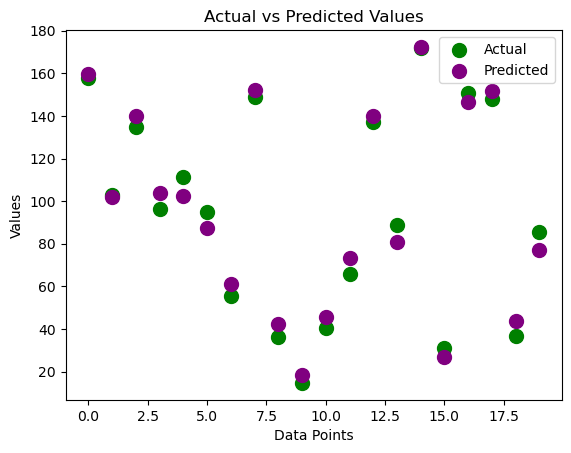

In [160]:
actual_values, predicted_values = predict_multivariate_linear_regression(df)

# Create an index array for each data point
data_points_index = np.arange(len(actual_values))

# Plotting Actual values above x-axis
plt.scatter(data_points_index, actual_values, color='green', marker='o', label='Actual', s=100)

# Plotting Predicted values below x-axis
plt.scatter(data_points_index, predicted_values, color='purple', marker='o', label='Predicted', s=100)

# Adding Labels and Title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Adding a Legend
plt.legend()

# Display the plot
plt.show()